In [1]:
# -*- coding: utf-8 -*-
import json # For reading COCO annotations file
import cv2   # For image loading and manipulation
import numpy as np  # For numerical and array operations

from matplotlib import pyplot as plt   # For visualizing images

import os  # For file system access
from ultralytics import YOLO  # For loading model

### High Level Steps

1. Load the trained model.
2. Get the file paths for the test images.
3. Generate predictions from the model.
4. Visualize predicted segmentation maps.
5. Generate distances between disks and laminar.

### STEP I: Load Model

After training, the best model weights will be saved. We can load these weights into memory.

In [2]:
# Path to weights
train_folder = "yolov9c"
WEIGHT_PATH = f"../{train_folder[:-1]}_segmentation/runs/segment/{train_folder}/weights/best.pt"

In [3]:
# Loaded model
model = YOLO(WEIGHT_PATH)

### STEP II: Get File Paths

Next, I get the paths for the train, test, and val files.

In [4]:
def return_split_files(split, dataset_folder = "segmentation_dataset", images = True):
    # Path to corresponding COCO annotations file
    if split == "test":
        ANN_PATH = "../extras/extra_coco_annotations.json"
    else:
        ANN_PATH = "../extras/coco_annotations.json"

    # Load annotations file
    file = json.load(open(ANN_PATH, "r"))

    ftype = "images" if images else "labels"
    
    image_base_dir = f"../datasets/{dataset_folder}/{ftype}/{split}"
    image_paths = [os.path.join(image_base_dir, f) for f in os.listdir(image_base_dir)]
    return image_paths

In [5]:
split = "train"

In [6]:
TRAIN_IMAGE_PATHS = return_split_files("train", "stenosis_dataset", True)

TEST_IMAGE_PATHS = return_split_files("test", "stenosis_dataset", True)

VAL_IMAGE_PATHS = return_split_files("val", "stenosis_dataset", True)

Next, I define a function for overlaying the annotations on their images.

### STEP III: Generate Predictions

In [7]:
def generate_predictions(images, shape = None, conf = .3):
    if shape is None:
        shape = (694, 542)
    
    images = [cv2.cvtColor(cv2.resize(cv2.imread(i), shape), cv2.COLOR_BGR2RGB) for i in images]
    
    return model.predict(
        images,
        imgsz = 640,
        conf = conf,
        agnostic_nms = True,
        iou = .8,
        show_boxes = False,
    )

In [8]:
# How many image paths do we have?
len(TEST_IMAGE_PATHS)

38

In [9]:
# How many image paths do we have?
len([x for x in TEST_IMAGE_PATHS if x is not None])

38

In [10]:
TEST_IMAGE_PATHS[0]

'../datasets/stenosis_dataset/images/test/p26_image_00015.png'

In [11]:
TEST_IMAGE_PATHS

['../datasets/stenosis_dataset/images/test/p26_image_00015.png',
 '../datasets/stenosis_dataset/images/test/p31_image_00014.png',
 '../datasets/stenosis_dataset/images/test/p31_image_00015.png',
 '../datasets/stenosis_dataset/images/test/p31_image_00016.png',
 '../datasets/stenosis_dataset/images/test/p31_image_00017.png',
 '../datasets/stenosis_dataset/images/test/p32_image_00012.png',
 '../datasets/stenosis_dataset/images/test/p32_image_00013.png',
 '../datasets/stenosis_dataset/images/test/p32_image_00014.png',
 '../datasets/stenosis_dataset/images/test/p32_image_00015.png',
 '../datasets/stenosis_dataset/images/test/p33_image_00014.png',
 '../datasets/stenosis_dataset/images/test/p33_image_00015.png',
 '../datasets/stenosis_dataset/images/test/p33_image_00016.png',
 '../datasets/stenosis_dataset/images/test/p33_image_00017.png',
 '../datasets/stenosis_dataset/images/test/p34_image_00012.png',
 '../datasets/stenosis_dataset/images/test/p34_image_00013.png',
 '../datasets/stenosis_da

In [12]:
# Obtain outputs for test images
confidence_threshold = .2
TEST_RESULTS = generate_predictions(TEST_IMAGE_PATHS, conf = confidence_threshold)

/home/harkhymadhe/miniforge3/envs/mri/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1708025831482/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


0: 512x640 7 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 19.1ms
1: 512x640 6 Diskss, 1 Laminar, 3 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 19.1ms
2: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 19.1ms
3: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 19.1ms
4: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 19.1ms
5: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 19.1ms
6: 512x640 4 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 4 Vertebraes, 19.1ms
7: 512x640 4 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 3 Vertebraes, 19.1ms
8: 512x640 4 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 3 Vertebraes, 19.1ms
9: 512x640 6 Diskss, 1 Laminar, 3 Spinal Canals, 2 Spinal Cords, 6 Vertebraes, 19.1ms
10: 512x640 6 Diskss, 1 Laminar, 4 Spinal Canals, 2 Spinal Cords, 6 Vertebraes, 19.1ms
11: 512x640 6 Diskss, 2 Laminars, 3 Spinal Canals, 2 Spinal Co

In [13]:
TEST_RESULTS[0].plot().shape

(542, 694, 3)

In [14]:
len(TEST_RESULTS)

38

### STEP IV: Visualize Predictions

Here, the predicted masks from the segmentation model are visualized.

In [15]:
def visualize_model_predictions(images, confidence_threshold = .3):
    """Predict segmentation masks for imagees and visualize them.
    
    Parameters:
    ----------
    images (List): A list of image paths.
    confidence_threshold (float): Confidence threshold for prediction.

    Returns:
    --------
    None
    """
    results = generate_predictions(images, confidence_threshold)
    pred = [r.plot(masks=True, boxes = False) for r in results]

    fig, axes = plt.subplots(nrows = 4, ncols = 5, figsize = (20, 15))


    for i in range(4):
        for j in range(5):
            index = (i * 5) + j
            axes[i, j].imshow(pred[index])
            axes[i, j].set_title(f"Image {index+1} (with mask)")
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

    plt.show()
    

In [16]:
try:
    visualize_model_predictions(TEST_IMAGE_PATHS, confidence_threshold)
except:
    pass

Let us visualize one random image just for clearer observation.

In [17]:
# Randomly select an index for image and mask selection
index = np.random.randint(low = 0, high = len(TEST_RESULTS))

In [18]:
index

36

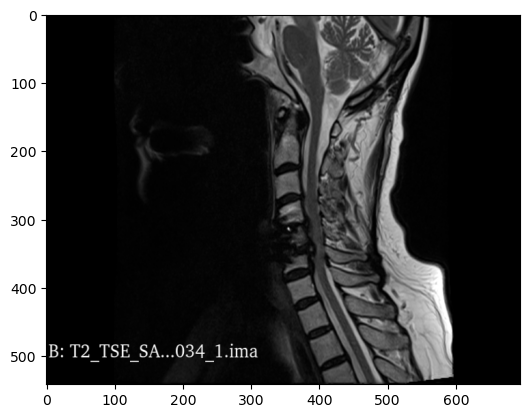

In [19]:
# Visualize prediction for randomly selected image
result = TEST_RESULTS[14]
img_ = result.plot(masks=True, boxes = False)
plt.imshow(result.orig_img)
plt.show()

### STEP V: Generate distances between disks and laminar

This will be done in a few steps:

1. __Relevant Channels__: The model predicts multiple channels per image. Some masks have 19 channels, others may have 16, and so on. I need a function that extracts the relevant channels that represent the disks and laminar channels.

2. __Disk and Laminar Coordinates__: With the appropriate disk and laminar channels selected above, the coordinates for the pixels that make up these objects are extracted using functions designed for that purpose.

3. __Disk and Laminar Edge Points__: The right edges of the disks are determined, and the left edges of the laminar are also determined.

4. __Matched Disk-to-Laminar Edge Points__: The determined edges for the disks and laminar are matched, i.e., the corrects points on a disk edge is matched to the correct point on the laminar edge.

5. __Disk-to-Laminar Distances__: The distance between the edge of the disks and the laminar are calculated using the matched points above.

6. __Distance and Bounding Box Filtration__: The disk-to-laminar coordinates generated are filtered based on distance.

7. __Bounding Box Generation and Processing__: Generate bounding boxes based on distances obtained, and process them for visualization and storage.

8. __YOLO-formatted Labels__: Format the bounding boxes to YOLO format and store them in appropriate files.

---

##### Sub-Step I: Relevant Channels

Here, I define two function to help me extract the right channels for the disks and laminar:

1. __extract_channels__.

---

In [20]:
def extract_channels(result):
    """Take in a Result object from model prediction. Return the right mask channels for the disks, the laminar and the spinal cord."""
    result_parts = result.summary()
    
    disk_channels = [i for i, part in enumerate(result_parts) if part['name'] == "Disks"]
    laminar_channel = [i for i, part in enumerate(result_parts) if part['name'] == "Laminar"]
    spinal_cord_channel = [i for i, part in enumerate(result_parts) if part['name'] == "Spinal Cord"]
    
    return disk_channels, laminar_channel[0], spinal_cord_channel[0]

In [21]:
b = TEST_RESULTS[index]
b_mask = b.masks.data.cpu().numpy()

In [22]:
mask_index = 1

In [23]:
b.summary()[mask_index]

{'name': 'Vertebrae',
 'class': 4,
 'confidence': 0.93129,
 'box': {'x1': 327.06131, 'y1': 143.23337, 'x2': 366.94626, 'y2': 193.28975},
 'segments': {'x': [335.0718688964844,
   333.9875183105469,
   332.90313720703125,
   331.8187561035156,
   331.8187561035156,
   330.734375,
   330.734375,
   329.6499938964844,
   329.6499938964844,
   330.734375,
   330.734375,
   329.6499938964844,
   329.6499938964844,
   330.734375,
   331.8187561035156,
   335.0718688964844,
   336.15625,
   339.4093933105469,
   340.4937744140625,
   341.578125,
   353.5062255859375,
   354.59063720703125,
   356.7593688964844,
   357.84375,
   358.9281311035156,
   360.01251220703125,
   361.0968933105469,
   362.1812438964844,
   365.43438720703125,
   366.5187683105469,
   366.5187683105469,
   365.43438720703125,
   365.43438720703125,
   364.3500061035156,
   364.3500061035156,
   363.265625,
   363.265625,
   362.1812438964844,
   362.1812438964844,
   361.0968933105469,
   361.0968933105469,
   360.012

In [24]:
b_mask.shape

(17, 512, 640)

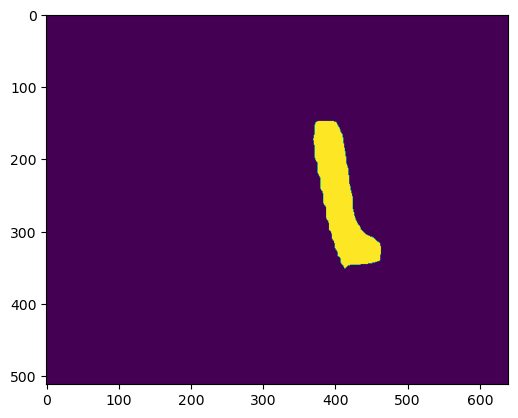

In [25]:
plt.imshow(b_mask[15])

In [26]:
extract_channels(b)

([6, 9, 10, 11, 12, 14], 15, 0)

In [27]:
disk_channels, laminar_channel, spinal_cord_channel = extract_channels(b)

In [28]:
disk_channels

[6, 9, 10, 11, 12, 14]

---

##### Sub-Step II: Disk and Laminar Coordinates

Here, I define a function named __extract_coordinates__ to help me extract the coordinates from the disk and laminar channels.

---

In [29]:
def extract_coordinates(mask, channel = 0, shape = None):
    """Extract the coordinates of the pixels representing the object (i.e., disk, spinal cord etc).
    
    Parameters:
    ------------
    image (np.ndarray): Predicted segmentation mask.
    channel (int): What channel to extract coordinates for.

    Returns:
    --------
    coords, unique_coords: A tuple containing:
        1. all coordinates for all pixels in the channels, and
        2. Unique rows for all pixels in the channels.
    """
    if shape is None:
        shape = (694, 542)
    
    mask_channel = cv2.resize(mask[channel], shape)
    rs, cs = np.where(mask_channel == 1)

    coordinates, unique_rows = tuple(zip(cs, rs)), list(set(rs))
    
    return coordinates, unique_rows

In [30]:
extract_coordinates(b_mask, channel = 0)

(((375, 111),
  (376, 111),
  (377, 111),
  (378, 111),
  (379, 111),
  (380, 111),
  (381, 111),
  (382, 111),
  (383, 111),
  (384, 111),
  (385, 111),
  (386, 111),
  (387, 111),
  (388, 111),
  (389, 111),
  (390, 111),
  (391, 111),
  (374, 112),
  (375, 112),
  (376, 112),
  (377, 112),
  (378, 112),
  (379, 112),
  (380, 112),
  (381, 112),
  (382, 112),
  (383, 112),
  (384, 112),
  (385, 112),
  (386, 112),
  (387, 112),
  (388, 112),
  (389, 112),
  (390, 112),
  (391, 112),
  (392, 112),
  (374, 113),
  (375, 113),
  (376, 113),
  (377, 113),
  (378, 113),
  (379, 113),
  (380, 113),
  (381, 113),
  (382, 113),
  (383, 113),
  (384, 113),
  (385, 113),
  (386, 113),
  (387, 113),
  (388, 113),
  (389, 113),
  (390, 113),
  (391, 113),
  (392, 113),
  (374, 114),
  (375, 114),
  (376, 114),
  (377, 114),
  (378, 114),
  (379, 114),
  (380, 114),
  (381, 114),
  (382, 114),
  (383, 114),
  (384, 114),
  (385, 114),
  (386, 114),
  (387, 114),
  (388, 114),
  (389, 114),
  (390

---

##### Sub-Step III: Disk and Laminar Edge Points

From the coordinates extracted for the different disks and laminar, the coordinates on the far right (for the disks) and the coordinates on the far left (for the laminar) need to be selected.This will allow me eventually calculate the distances between the disks and laminar using the right coordinates.

Here, I define a number of functions to help me extract the right channels for the disks:

1. __find_left_coordinates__, and
2. __find_right_coordinates__.

---

In [31]:
def find_left_coordinates(coords, unique_rs):
    max_rs = []
    for rs in unique_rs:
        sub_rs = sorted(list(filter(lambda x: x[1] == rs, coords)), key = lambda x: x[0])
        max_rs.append(sub_rs[0])
        
    return max_rs

In [32]:
def find_right_coordinates(coords, unique_rs):
    max_rs = []
    for rs in unique_rs:
        sub_rs = sorted(list(filter(lambda x: x[1] == rs, coords)), key = lambda x: x[0])
        max_rs.append(sub_rs[-1])

    max_rs = sorted(max_rs, key = lambda x: x[0], reverse = True)
    return max_rs

To test the edge coordinate finding functions, I need to first extract the coordinates of the disks and laminar:

In [33]:
# Select a sample segmentation mask
sample_mask = TEST_RESULTS[index].masks.data.cpu().numpy()

In [34]:
sample_mask.shape

(17, 512, 640)

In [35]:
# Disk coordinates
disk_coords, disk_unique_rs = extract_coordinates(sample_mask, channel = disk_channels[0])

In [36]:
# Laminar coordinates
laminar_coords, laminar_unique_rs = extract_coordinates(sample_mask, channel = laminar_channel)

In [37]:
disk_max_rs_ = find_right_coordinates(disk_coords, disk_unique_rs)

In [38]:
laminar_min_rs_ = find_left_coordinates(laminar_coords, laminar_unique_rs)

In [39]:
disk_max_rs_

[(400, 336),
 (399, 333),
 (399, 334),
 (399, 335),
 (398, 332),
 (398, 337),
 (396, 331),
 (394, 338),
 (393, 339),
 (392, 340),
 (389, 341),
 (381, 342),
 (381, 343),
 (380, 344),
 (379, 345),
 (377, 346)]

In [40]:
laminar_min_rs_

[(408, 157),
 (406, 158),
 (405, 159),
 (405, 160),
 (405, 161),
 (404, 162),
 (404, 163),
 (404, 164),
 (404, 165),
 (404, 166),
 (404, 167),
 (404, 168),
 (404, 169),
 (404, 170),
 (404, 171),
 (404, 172),
 (404, 173),
 (404, 174),
 (404, 175),
 (404, 176),
 (403, 177),
 (403, 178),
 (403, 179),
 (403, 180),
 (403, 181),
 (403, 182),
 (402, 183),
 (402, 184),
 (403, 185),
 (403, 186),
 (403, 187),
 (403, 188),
 (403, 189),
 (403, 190),
 (404, 191),
 (404, 192),
 (404, 193),
 (404, 194),
 (404, 195),
 (404, 196),
 (404, 197),
 (404, 198),
 (404, 199),
 (404, 200),
 (404, 201),
 (404, 202),
 (404, 203),
 (404, 204),
 (404, 205),
 (404, 206),
 (404, 207),
 (404, 208),
 (404, 209),
 (405, 210),
 (405, 211),
 (405, 212),
 (406, 213),
 (406, 214),
 (407, 215),
 (408, 216),
 (408, 217),
 (408, 218),
 (408, 219),
 (408, 220),
 (408, 221),
 (408, 222),
 (408, 223),
 (408, 224),
 (408, 225),
 (408, 226),
 (408, 227),
 (408, 228),
 (408, 229),
 (408, 230),
 (408, 231),
 (409, 232),
 (409, 233),

---

##### Sub-Step IV: Matched Disk-to-Laminar Edge Points

Now that the coordinates at the right-most edge (for the disks) and the left-most edge (for the laminar) have been determined, they need to be matched appropriately from disk-to-laminar. The distance between these coordinates should also be converted from pixels to millimeter (mm) if need be.

This is done via a function defined as __match_disk_and_laminar_coords__.

---

In [41]:
def match_disk_and_laminar_coords(
    disk_coords,
    laminar_coords,
    pixel_to_mm = .263,
    scale_distances = False
):
    """Take in disk and laminar coordinates and return them in matched/aligned pairs, as well as the distance between them."""
    matched_coords = []

    laminar_coords, disk_coords = list(laminar_coords), list(disk_coords)
    
    for disk_coord in disk_coords:
        for laminar_coord in laminar_coords:
            if laminar_coord[-1] == disk_coord[-1]:
                matched_coords.append([disk_coord, laminar_coord])
                laminar_coords.remove(laminar_coord)
                break

    final_matched_coords = []

    for A, B in matched_coords:
        dist = (A[0] - B[0])**2 + (A[1] - B[1])**2
        dist = dist ** .5

        if scale_distances:
            dist *= pixel_to_mm
        final_matched_coords.append((A, B, dist))

    return final_matched_coords

In [42]:
final_matched_coords = match_disk_and_laminar_coords(
    disk_max_rs_,
    laminar_min_rs_,
    scale_distances = True
)

In [43]:
final_matched_coords

[((400, 336), (434, 336), 8.942),
 ((399, 333), (433, 333), 8.942),
 ((399, 334), (433, 334), 8.942),
 ((399, 335), (434, 335), 9.205),
 ((398, 332), (433, 332), 9.205),
 ((398, 337), (434, 337), 9.468),
 ((396, 331), (432, 331), 9.468),
 ((394, 338), (434, 338), 10.52),
 ((393, 339), (434, 339), 10.783000000000001),
 ((392, 340), (434, 340), 11.046000000000001),
 ((389, 341), (434, 341), 11.835),
 ((381, 342), (435, 342), 14.202),
 ((381, 343), (435, 343), 14.202),
 ((380, 344), (435, 344), 14.465),
 ((379, 345), (436, 345), 14.991000000000001),
 ((377, 346), (438, 346), 16.043)]

In [44]:
len(final_matched_coords)

16

---

##### Sub-Step V: Disk-to-Laminar Distances

With the coordinates matched between the disks and the laminar, I can now generate the distances between these coordinates. These distances can then be plotted on a background for visual conformation.

---

In [45]:
def generate_distances(disk_channel, laminar_channel, mask, shape = None, scale_distances=False):
    """Return the coordinates of the edges of a disk and the laminar, as well as the distances between these edges at different points.

    Parameters:
    -----------
    disk_channel (int): The index for the disk channel.
    laminar_channel (int): The index for the laminar channel.

    Returns:
    --------
    results: List containing tuple of three values arranged as (disk_coord, laminar_coord, disk-to-laminar distance).
    """
    # Disk coordinates
    disk_coords, disk_unique_rs = extract_coordinates(
        mask,
        channel = disk_channel,
        shape = shape
    )
    # Laminar coordinates
    laminar_coords, laminar_unique_rs = extract_coordinates(
        mask,
        channel = laminar_channel,
        shape = shape
    )

    # Find right edge coordinates for the disk
    disk_max_rs_ = find_right_coordinates(disk_coords, disk_unique_rs)
    # Find left edge coordinates for the laminar
    laminar_min_rs_ = find_left_coordinates(laminar_coords, laminar_unique_rs)

    # Match the disk and laminar coordinates and generate the distance betwen them
    final_matched_coords = match_disk_and_laminar_coords(
        disk_max_rs_,
        laminar_min_rs_,
        scale_distances=scale_distances
    )
    return final_matched_coords

In [46]:
def generate_all_distances(disk_channels, laminar_channel, mask, shape = None, scale_distances=False):
    """Return the coordinates and distances of all the disk and laminar edges.

    Parameters:
    -----------
    disk_channels (List[int]): List of all the disk channels.
    laminar_channel (int): The index for the laminar channel.

    Returns:
    --------
    results: List containing distance information for all disk channels.
    """
    return [
        generate_distances(
            disk_channel,
            laminar_channel,
            mask = mask,
            shape = shape,
            scale_distances = scale_distances
        )
        for disk_channel in disk_channels
    ]

In [47]:
def generate_distances_for_image(
    result_index = 0,
    results = None,
    laminar = True,
    scale_distances = False
):
    try:
        result = results[result_index]
    except:
        result = TEST_RESULTS[result_index]
    
    disk_channels, laminar_channel, spinal_cord_channel = extract_channels(result)
    mask = result.masks.data.cpu().numpy()

    shape = list(result.orig_shape)
    shape.reverse()
    shape = tuple(shape)
    
    return (
        generate_all_distances(
            disk_channels,
            laminar_channel,
            mask,
            shape = shape,
            scale_distances = scale_distances
        )
        if laminar else generate_all_distances(
            disk_channels,
            spinal_cord_channel,
            mask,
            shape = shape,
            scale_distances = scale_distances
        )
    )

In [48]:
index

36

In [49]:
generate_distances_for_image(result_index = index)

[[((400, 336), (434, 336), 34.0),
  ((399, 333), (433, 333), 34.0),
  ((399, 334), (433, 334), 34.0),
  ((399, 335), (434, 335), 35.0),
  ((398, 332), (433, 332), 35.0),
  ((398, 337), (434, 337), 36.0),
  ((396, 331), (432, 331), 36.0),
  ((394, 338), (434, 338), 40.0),
  ((393, 339), (434, 339), 41.0),
  ((392, 340), (434, 340), 42.0),
  ((389, 341), (434, 341), 45.0),
  ((381, 342), (435, 342), 54.0),
  ((381, 343), (435, 343), 54.0),
  ((380, 344), (435, 344), 55.0),
  ((379, 345), (436, 345), 57.0),
  ((377, 346), (438, 346), 61.0)],
 [((367, 190), (403, 190), 36.0),
  ((367, 191), (404, 191), 37.0),
  ((367, 192), (404, 192), 37.0),
  ((366, 188), (403, 188), 37.0),
  ((366, 189), (403, 189), 37.0),
  ((366, 193), (404, 193), 38.0),
  ((366, 194), (404, 194), 38.0),
  ((365, 187), (403, 187), 38.0),
  ((365, 195), (404, 195), 39.0),
  ((364, 196), (404, 196), 40.0),
  ((362, 197), (404, 197), 42.0),
  ((351, 198), (404, 198), 53.0),
  ((351, 199), (404, 199), 53.0),
  ((350, 200)

In [50]:
generated_distances_for_index = generate_distances_for_image(result_index = index)

Next, I define functions that allow visualization of the generated distances.

In [51]:
def plot_distance_for_image(
    result_index = 0,
    results = None,
    laminar = True,
    scale_distances = False,
    color = None,
    disks = None
):
    if color is None:
        color = (20, 254, 190)

    try:
        result = results[result_index]
    except:
        result = TEST_RESULTS[result_index]

    shape = list(result.orig_shape)
    shape.reverse()
    shape = tuple(shape)

    image = result.orig_img

    generated_distances = generate_distances_for_image(
        result_index = result_index,
        results = results,
        laminar = laminar,
        # shape = shape,
        scale_distances = scale_distances
    )

    if disks is None:
        disks = list(range(6))

    print(disks)
    
    for coord_index, coords in enumerate(generated_distances):
        if ((not bool(coords)) or (coord_index not in disks)):
            print(coord_index, "not in disks")
            continue
        
        print("Plotting for disk", coord_index)
        for i, (cX, cY, _) in enumerate(coords):
            if i % 4:
                continue
            elif i == int(len(coords)/2):
                break
            
            image = cv2.line(image, cX, cY, color=color, thickness=1)
    
    plt.imshow(image)
    plt.show(); plt.close()
    del image
    return

In [52]:
def plot_distances(distances, image = None, blank = False):
    """Plot the distances generated for all the disk and laminar edges.

    Parameters:
    -----------
    distances (List): Distance information generated for all disks and the laminar.

    Returns:
    --------
    None: Plots a graph and returns nothing.
    """
    if blank:
        image = np.zeros(shape = sample_mask[0].shape)
        color = (0, 255, 255)
    else:
        image = cv2.imread(TEST_IMAGE_PATHS[index]) if image is None else image
        color = (0, 255, 0)

    for coords in distances:
        if not bool(coords):
            continue
        
        min_dist = min(map(lambda x: x[-1], coords))
        
        for i, (cX, cY, d) in enumerate(coords):
            if d > (min_dist *2):
                break
            image = cv2.line(image, cX, cY, color=color, thickness=1)

    plt.imshow(image)
    plt.show(); plt.close()

In [53]:
mask = TEST_RESULTS[10].masks.data.cpu().numpy()

In [54]:
mask.shape

(19, 512, 640)

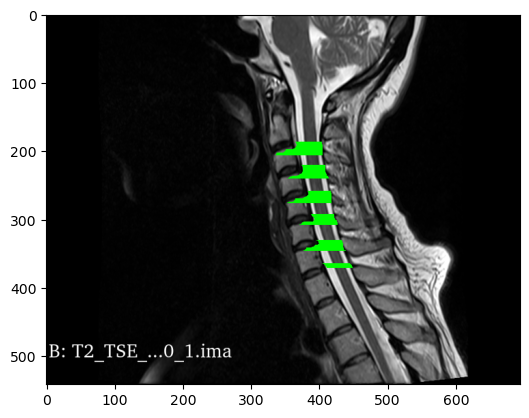

In [55]:
# Plot all the distances generated (version 1)
plot_distances(generated_distances_for_index)

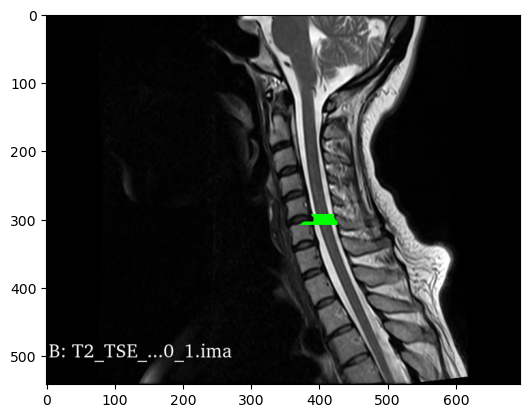

In [56]:
plot_distances([generated_distances_for_index[3]])

[0, 1, 2, 3, 4, 5]
0 not in disks
Plotting for disk 1
Plotting for disk 2
Plotting for disk 3
Plotting for disk 4
Plotting for disk 5


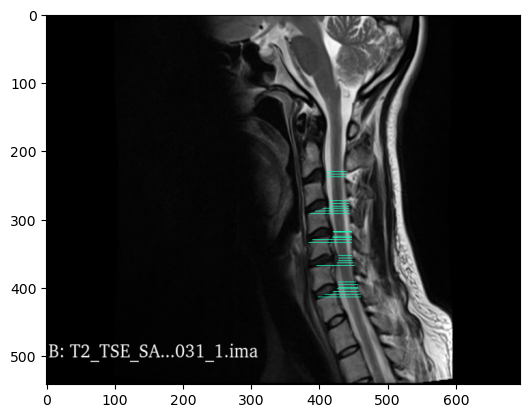

In [57]:
plot_distance_for_image(result_index = 1)

[0, 1, 2, 3, 4, 5]
Plotting for disk 0
1 not in disks
Plotting for disk 2
Plotting for disk 3
Plotting for disk 4
Plotting for disk 5
6 not in disks


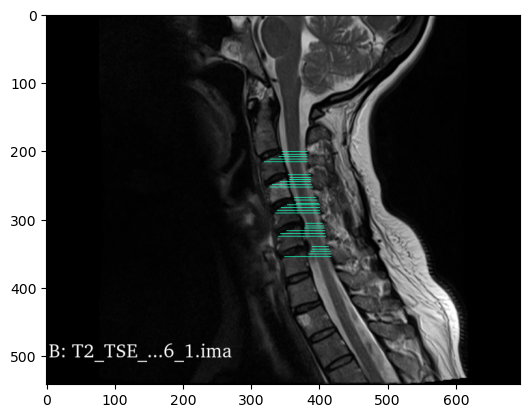

In [58]:
plot_distance_for_image(result_index = 17)

---

##### Sub-Step VI: Distance and Bounding Box Filtration

With the distances generated and plotted, the next step is to:

1. Filter the coordinates based on distance (some disk coordinates are too far from the laminar, as ccan be seen from some images displayed prior).
2. Filter the bounding boxes based on their height (some bounding boxes are just too small to be considered).

This is done by defining appropriate functions.

---

In [59]:
def filter_distances(distances, distance_threshold = None, blank = False):
    """Plot the distances generated for all the disk and laminar edges.

    Parameters:
    -----------
    distances (List): Distance information generated for all disks and the laminar.

    Returns:
    --------
    None: Plots a graph and returns nothing.
    """
    final_distances = []
    
    for coords in distances:
        if not bool(coords):
            continue
        
        new_coords = []
        if distance_threshold is None:
            distance_threshold = min(map(lambda x: x[-1], coords)) * 2
        
        for i, (cX, cY, d) in enumerate(coords):
            if d > distance_threshold:
                break
            new_coords.append((cX, cY, d))

        final_distances.append(new_coords)

    return final_distances

In [60]:
def filter_bboxes(bboxes, height = 3):
    """Filter the bounding boxes based on height.

    Parameters:
    -----------
    distances (List): Distance information generated for all disks and the laminar.

    Returns:
    --------
    None: Plots a graph and returns nothing.
    """
    new_bboxes = []
    
    for top, bottom, bbox_class in bboxes:
        upper_left, upper_right = top
        lower_left, lower_right = bottom

        if abs(upper_left[1] - lower_left[1]) <= height:
            continue

        new_bboxes.append((top, bottom, bbox_class))

    return new_bboxes

---

##### Sub-Step VII: Bounding Box Generation and Processing

With the disk-to-laminar coordinates and distances generated and filtered, the next step is to generate bounding boxes from them, and process these bounding boxes into displayable format. These can be done via the __generate_bboxes__ and __process_bboxes__ functions.

Functions will also be defined for visualizing these bounding boxes, specifically __plot_bbox_type__, __plot_multiple_bbox_types__, and __plot__bboxes_for_image__.

---

In [61]:
def generate_bboxes(
    distances,
    filter_distance = True,
    distance_threshold = None,
    lower_limit = 0,
    upper_limit = 10
):
    if filter_distance:
        distances = filter_distances(
            distances = distances,
            distance_threshold = distance_threshold
        )

    all_boxes = []

    for coords in distances:
        if not bool(coords):
            continue
        boxes = []
        min_dist = min(map(lambda x: x[-1], coords))
        
        for i, (cX, cY, d) in enumerate(coords):
            if (d > lower_limit) and (d < upper_limit):
                dist = (cX[0] - cY[0])**2 + (cX[1] - cY[1])**2
                boxes.append((cX, cY, dist**.5))
            else:
                if len(boxes) > 0:
                    all_boxes.append(boxes)
                    # boxes.clear()
                continue

        all_boxes.append(boxes)

    return all_boxes

In [62]:
def process_bboxes(bboxes, height, bbox_class = None):
    new_boxes = []
    for bbox in bboxes:
        if len(bbox) < 1:
            continue
        left_points = [x[0] for x in bbox]
        lowest_x = min([x[0] for x in left_points])
        
        right_points = [x[1] for x in bbox]
        highest_x = max([x[0] for x in right_points])

        lowest_y = min([x[1] for x in right_points])
        highest_y = max([x[1] for x in right_points])


        upper_left = (lowest_x, lowest_y)
        upper_right = (highest_x, lowest_y)

        lower_left = (lowest_x, highest_y)
        lower_right = (highest_x, highest_y)

        new_top = [upper_left, upper_right]
        new_bottom = [lower_left, lower_right]

        new_boxes.append((new_top, new_bottom, bbox_class))

    new_bboxes = []
    
    for b in new_boxes:
        if (new_boxes.count(b) > 1 and b not in new_bboxes) or (new_boxes.count(b) == 1):
            new_bboxes.append(b)

    return filter_bboxes(new_bboxes, height = height)

In [63]:
def plot_bbox_type(bboxes, color = None, image = None, blank = False):
    """Plot the distances generated for all the disk and laminar edges.

    Parameters:
    -----------
    distances (List): Distance information generated for all disks and the laminar.

    Returns:
    --------
    None: Plots a graph and returns nothing.
    """
    if blank:
        image = np.zeros(shape = sample_mask[0].shape)
        color = (0, 255, 255) if color is None else color
    else:
        image = cv2.imread(TEST_IMAGE_PATHS[index]) if image is None else image
        color = (0, 255, 0) if color is None else color

    for top, bottom, bbox_class in bboxes:
        upper_left, upper_right = top
        lower_left, lower_right = bottom
        
        image = cv2.line(image, upper_left, upper_right, color=color, thickness=1)
        image = cv2.line(image, lower_left, lower_right, color=color, thickness=1)

        image = cv2.line(image, upper_left, lower_left, color=color, thickness=1)
        image = cv2.line(image, upper_right, lower_right, color=color, thickness=1)

    return image

In [64]:
def plot_multiple_bbox_types(bboxes, colors = None, image = None, blank = False):
    """Plot the distances generated for all the disk and laminar edges.

    Parameters:
    -----------
    distances (List): Distance information generated for all disks and the laminar.

    Returns:
    --------
    None: Plots a graph and returns nothing.
    """

    if colors is None:
        colors = [np.random.randint(low = 0, high = 256, size = (3,)).tolist() for _ in range(len(bboxes))]

    assert (len(colors) == len(bboxes)) or colors is None
    
    image = None
    for bbox, c in zip(bboxes, colors):
        image = plot_bbox_type(bboxes = bbox, color = c, image = image)

    return image

I can now combine these functions above to easily visualize the bounding boxes generated for any image. All that is needed is the index for said image.

In [65]:
def plot_bboxes_for_image(
    result_index = 0,
    results = None,
    laminar = True,
    scale_distances = True,
    filter_distance = True,
    distance_threshold = None,
    lower_limit = 0,
    upper_limit = 9,
    height = 3,
    color = None
):
    """Display specific image as well as the generated bounding boxes for that image."""

    # Generate disk-to-laminar coordinates and the appropriate distances
    generated_distances = generate_distances_for_image(
        result_index = result_index,
        results = results,
        laminar = laminar,
        scale_distances = scale_distances
    )

    # Generate bounding box information
    generated_bboxes = generate_bboxes(
        generated_distances,
        filter_distance = filter_distance,
        distance_threshold = distance_threshold,
        lower_limit = lower_limit,
        upper_limit = upper_limit
    )

    # Process the bounding box informatio generated into displayable format
    processed_bboxes = process_bboxes(generated_bboxes, height = height, bbox_class = None)
    
    # Extract the right image for the distances to be calculated
    try:
        result = results[result_index]
    except:
        result = TEST_RESULTS[result_index]
    
    image = result.orig_img.copy()

    # Inscribe the bounding boxes on the image
    image_ = plot_bbox_type(processed_bboxes, color = color, image = image, blank = False)
    
    # Display the image on screen
    # plt.imshow(image_)
    # plt.show(); plt.close("all")
    return image_

This function __plot_bboxes_for_image__ can be tested with any image now.

In [66]:
# Set colors
colors = [
    (0, 255, 0),
    (0, 255, 0),
    (0, 0, 255)
]

In [67]:
# Set index for patient of interest
patient_index = 30

In [68]:
# Test the `plot_bboxes_for_image` function on any image index
test_index = 0
image_ = plot_bboxes_for_image(result_index = patient_index, distance_threshold = 14.5, scale_distances = True)

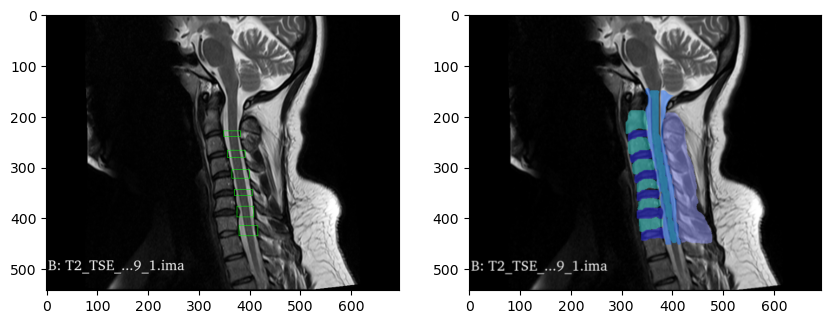

In [69]:
f, a = plt.subplots(1, 2, figsize = (10, 10))
a[0].imshow(image_)
a[1].imshow(TEST_RESULTS[patient_index].plot(boxes = False))

---

##### Sub-Step VIII: YOLO-formatted Data

With the bounding boxes finally generated, the data is formatted in YOLO format.

---

In [70]:
def to_yolo_label_format(bboxes, scale = True, width = 694, height = 542):
    """Convert generated bounding box details to YOLO format for storage.
    
    Parameters:
    -----------
    bboxes (List): Collection of bounding boxes.
    scale (bool): Whether or not to scale the bounding box coordinates.
    width (int): Width constant for bounding box scaling.
    height (int): Height constant for bounding box scaling.

    Returns:
    --------
    Bounding box information in YOLO format.
    """
    annotations = []
    
    for bbox in bboxes:
        upper_left, upper_right = bbox[0]
        lower_left, lower_right = bbox[1]
        bbox_class = bbox[2]

        height_difference = lower_left[1] - upper_left[1]
        width_difference = abs(lower_left[0] - lower_right[0])

        x_center = upper_left[0] + int(width_difference//2)
        y_center = upper_left[1] + int(height_difference//2)

        if scale:
            labels = [bbox_class, x_center / width, y_center / height, width_difference / width, height_difference / height]
        else:
            labels = [bbox_class, x_center, y_center, width_difference, height_difference]
        
        annotations.append(labels)

    return annotations

The __generate_bboxes__, __process_bboxes__, and __to_yolo_label_format__ functions above are tested as below:

In [71]:
disk_spinal_cord_distances = generate_distances_for_image(result_index = index, laminar = False)

In [72]:
new_bboxes = generate_bboxes(
    disk_spinal_cord_distances,
    filter_distance = True,
    lower_limit = 0,
    upper_limit = 14
)

new_bboxes = process_bboxes(new_bboxes, height = 3)

In [73]:
new_bboxes

[([(396, 331), (413, 331)], [(396, 336), (413, 336)], None),
 ([(388, 293), (400, 293)], [(388, 303), (400, 303)], None),
 ([(374, 221), (387, 221)], [(374, 233), (387, 233)], None),
 ([(378, 259), (391, 259)], [(378, 268), (391, 268)], None)]

In [74]:
filter_bboxes(new_bboxes)

[([(396, 331), (413, 331)], [(396, 336), (413, 336)], None),
 ([(388, 293), (400, 293)], [(388, 303), (400, 303)], None),
 ([(374, 221), (387, 221)], [(374, 233), (387, 233)], None),
 ([(378, 259), (391, 259)], [(378, 268), (391, 268)], None)]

In [75]:
to_yolo_label_format(new_bboxes, scale = False)

[[None, 404, 333, 17, 5],
 [None, 394, 298, 12, 10],
 [None, 380, 227, 13, 12],
 [None, 384, 263, 13, 9]]

In [76]:
len(TEST_IMAGE_PATHS)

38

With the functions above working, the next phase is to combine all the required functions to define a new function, __generate_yolo_labels__. This new function will finally generate the boundig boxes for stenosis detection training.

In [77]:
def generate_yolo_labels(
    image_paths,
    shape = None,
    confidence_threshold = .25,
    height = 10,
    distance_threshold = None,
    limits = None,
    scale_distances = False,
    laminar = False
):

    if limits is None:
        limits = [
            (0, 14),
            (14, 28),
            (28, 100)
        ]
    # Extract underlying arrays for predicted masks
    results = generate_predictions(image_paths, shape = shape, conf = confidence_threshold)
    
    # Generate all disk-to-laminar cordinates and distances
    generated_distances = [
        generate_distances_for_image(
            result_index,
            results = results,
            laminar = laminar,
            scale_distances = scale_distances
        )
        for result_index in range(len(results))
    ]

    # Generate bounding box information from all disk-to-laminar cordinates and distances above
    generated_bboxes = [
        [
            generate_bboxes(
                distances,
                filter_distance = True,
                distance_threshold = distance_threshold,
                lower_limit = l,
                upper_limit = u
            )
            for (l, u) in limits
        ]
        for (result, distances) in zip(results, generated_distances)
    ]

    # Process the bounding box information
    stenosis_bboxes = [
        [
            process_bboxes(bbox, bbox_class = len(gbboxes) - i - 1, height = height)
            for i, bbox in enumerate(gbboxes)
        ]
        for gbboxes in generated_bboxes
    ]

    # Convert bounding boxes to YOLO format
    yolo_labels = [[to_yolo_label_format(bbox) for bbox in processed_bboxes] for processed_bboxes in stenosis_bboxes]

    # Save all YOLO bounding boxes for each image to the appropriate file
    for path, label in zip(image_paths, yolo_labels):
        label_path = path.replace(".png", ".txt").replace("images", "labels")
    
        if not any(label):
            continue
    
        with open(label_path, "w") as f:
            for label_set in label:
                if bool(label_set):
                    for label_line in label_set:
                        print(f"{label_line}".replace(",", "")[1:-1] + "\n")
                        f.write(f"{label_line}".replace(",", "")[1:-1] + "\n")

    return None

---

Next, for using this function, I set the limits for determining the grade of stenosis. According to literature, the grades of stenosis are:

1. 12 - 14 mm (All good i.e., Grade 0 Stenosis)
2. 10 - 12 mm (Things are a little worrisome i.e., Grade 1 Stenosis)
3. 8 - 10 mm (There is some trouble i.e., Grade 2 Stenosis)
4. < 8 mm (Things are very serious i.e., Grade 3 Stenosis)

---

In [78]:
# Limits for stenosis graduation
final_limits = [
    (0, 8),
    (8, 10),
    (10, 12),
    (12, 100)
]

Now, I call the higher-order function. This function will generate the distances betweeen the disks and the laminar, and use these distances (after filtering) to generate bounding boxes. These bounding boxes will then be filtered according to their size, and converted to YOLO format. The YOLO-formatted bounding boxes will now be stored as YOLO label files for future training.

In [82]:
generate_yolo_labels(
    VAL_IMAGE_PATHS,
    height = 3,
    scale_distances = True,
    # distance_threshold = 50,
    distance_threshold = 14.5,
    limits = final_limits,
    laminar = True
)


0: 512x640 6 Diskss, 1 Laminar, 3 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
1: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
2: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
3: 512x640 6 Diskss, 1 Laminar, 3 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
4: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
5: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
6: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
7: 512x640 7 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
8: 512x640 7 Diskss, 1 Laminar, 2 Spinal Canals, 2 Spinal Cords, 6 Vertebraes, 126.9ms
9: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
10: 512x640 6 Diskss, 1 Laminar, 2 Spinal Canals, 1 Spinal Cord, 6 Vertebraes, 126.9ms
11: 512x640 6 Diskss, 1 Laminar, 3 Spinal Canals, 1

In [80]:
generate_distances_for_image(0, scale_distances = True)

[[((389, 374), (427, 374), 9.994), ((388, 373), (426, 373), 9.994)],
 [((380, 306), (408, 306), 7.364000000000001),
  ((380, 307), (408, 307), 7.364000000000001),
  ((380, 308), (408, 308), 7.364000000000001),
  ((380, 309), (408, 309), 7.364000000000001),
  ((380, 310), (408, 310), 7.364000000000001),
  ((380, 311), (409, 311), 7.627000000000001),
  ((379, 305), (408, 305), 7.627000000000001),
  ((379, 312), (409, 312), 7.890000000000001),
  ((379, 313), (410, 313), 8.153),
  ((367, 314), (412, 314), 11.835),
  ((367, 315), (412, 315), 11.835),
  ((365, 316), (412, 316), 12.361),
  ((351, 317), (413, 317), 16.306),
  ((350, 318), (413, 318), 16.569),
  ((350, 319), (413, 319), 16.569),
  ((348, 320), (413, 320), 17.095000000000002),
  ((342, 321), (413, 321), 18.673000000000002),
  ((341, 322), (413, 322), 18.936),
  ((340, 323), (413, 323), 19.199),
  ((339, 324), (413, 324), 19.462),
  ((339, 325), (413, 325), 19.462)],
 [((367, 273), (400, 273), 8.679),
  ((367, 274), (400, 274), 8